<div style="width:100%"><a href="https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-exercices-et-problemes-corriges"><img src="https://python.guillod.org/livre/banner.png"/></a></div>

Ce fichier reflète les énoncés des exercices d'un chapitre du livre *[Programmation Python par la pratique](https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-exercices-et-problemes-corriges)*. Tous les énoncés peuvent être téléchargés au format [Jupyter Notebook](https://python.guillod.org/livre/) ou exécutés directement en ligne sur [GESIS](https://notebooks.gesis.org/binder/v2/gh/guillod/livre-python/master?urlpath=lab). Les corrigés sont disponibles dans le livre en version papier (ISBN [9782100815142](https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-exercices-et-problemes-corriges)) ou numérique (ISBN [9782100819089](https://www.dunod.com/sciences-techniques/programmation-python-par-pratique-exercices-et-problemes-corriges)) publiés chez Dunod. Ce fichier reflète les exercices tels que publiés dans cet ouvrage et diffère quelque peu des exercices présentés à la page [python.guillod.org](https://python.guillod.org/).

# 10 Probabilités et statistiques

<div id="ch:proba-stats"></div>

Dans un premier temps, la statistique de la proportion de nombres commençant par un certain chiffre sera étudiée. Puis dans un second, des modèles probabilistes importants seront introduits et simulés, comme les marches aléatoires ou la percolation.

**Concepts abordés:**

* statistiques et probabilités

* série harmonique aléatoire

* marche aléatoire

* percolation

* transition de phase

* histogrammes

* importation de données

* optimisation par compilation



# Exercice 10.1: Loi de Benford

La loi de Benford prédit que statistiquement dans une liste de nombres donnés, la probabilité qu'un de ces nombres commence par le chiffre 1 est plus importante que celle qu'il commence par le chiffre 9. Plus précisément la loi de Benford prédit que la probabilité qu'un nombre commence par le chiffre $d$ est:

$$
p_d = \log_{10}\bigg(1+\frac{1}{d}\bigg) \,,
$$

où $\log_{10}$ désigne le logarithme en base 10.
Il est possible de vérifier que la loi de Benford est la seule qui reste invariante par changement d'unités, *i.e.* en multipliant les nombres de la liste par une constante les probabilités précédentes restent inchangées.

**a)**
Écrire une fonction `firstdigit(n)` qui pour un nombre `n` donné retourne son premier chiffre et une fonction `occurrences(liste)` qui retourne le nombre d'occurrences des premiers chiffres de `liste`.

**Indication.**
Faire en sorte que la fonction `occurrences` fonctionne même si la liste contient des zéros en les ignorant.





**b)**
Vérifier si la loi de Benford semble satisfaite pour la suite des nombres $(2^n)_ {n\in\mathbb{N}}$ en comparant l'histogramme empirique avec la loi de Benford.




**c)**
Vérifier si la loi de Benford semble satisfaite pour la suite des nombres $(3n+1)_ {n\in\mathbb{N}}$.




**d)**
En allant sur le site de l'INSEE à l'adresse: <https://insee.fr/fr/statistiques/4171341?sommaire=4171351>, télécharger le fichier au format TXT contenant les données de la population par sexe et âge regroupé (POP1A). Importer ces données pour avoir la population par code postal, sexe et tranche d'âge.

**Indication.**
La documentation sur comment lire un fichier est disponible [ici](https://docs.python.org/fr/3/tutorial/inputoutput.html#reading-and-writing-files). À noter que les fichiers TXT de l'INSEE sont encodés au format ISO-8859-1.




**e)**
Déterminer si la liste de toutes les populations par commune, sexe et âge suit la loi de Benford.




**f)**
Sommer les données précédentes pour obtenir la liste des populations par commune et déterminer si elle suit la loi de Benford.




**g)**
<font color="red">!!</font> Lire la documentation du module Pandas disponible [ici](https://pandas.pydata.org/docs/) et l'utiliser pour refaire les deux questions précédentes mais avec le fichier de population POP1B avec les âges non regroupés.

**Indication.**
Utiliser la fonction `read_csv` de Pandas.





**h)**
<font color="red">!!</font> En allant sur le site de l'INSEE ou autre télécharger son jeu de données préféré et tester s'il suit la loi de Benford.

**Indication.**
Utiliser par exemple les comptes détaillés de l'État disponibles [ici](https://www.data.gouv.fr/fr/datasets/donnees-de-comptabilite-generale-de-letat/).



# Exercice 10.2: Série harmonique de signe aléatoire



Le but de cet exercice est de simuler la convergence d'une série harmonique donc le signe est tiré aléatoirement. Plus précisément si $(X_i)_{i\in\mathbb{N}}$ est une suite de variables aléatoires indépendantes valant $-1$ ou $1$ avec probabilité $\frac{1}{2}$, alors on définit la somme partielle:

$$
W_0 = 0 \,, \qquad\qquad W_n = \sum_{i=1}^n \frac{X_i}{i} \,,
$$

et la question est de déterminer si la suite $(W_n)_{n\in\mathbb{N}}$ converge et si oui vers quoi.

**a)**
Écrire une fonction `sign()` qui simule la variable aléatoire $X_i$.




**b)**
Écrire une fonction `simulate(n)` qui retourne une liste avec une réalisation de $(W_0,W_1,W_2,\dots,W_n)$.




**c)**
Faire la représentation graphique de la fonction $n \mapsto W_n$ pour différentes réalisations par exemple pour $0\leq n\leq 1 000$ et émettre une conjecture quant à la convergence de la suite $(W_n)_{n\in\mathbb{N}}$.




**d)**
<font color="red">!</font>
Déterminer l'histogramme de $W_{1 000}$ pour $10^4$ ou $10^5$ réalisations pour avoir une idée de la loi de la variable aléatoire limite.



# Exercice 10.3: Ruine du joueur

Le but est de simuler l'évolution de la somme d'argent d'un joueur jouant à pile ou face. À chaque lancer le joueur gagne un euro si c'est pile et en perd un si c'est face. La probabilité d'obtenir pile est notée $p$, celle d'obtenir face $q$. En particulier $p=q=\frac{1}{2}$ si la pièce est équilibrée.

Mathématiquement, la somme $S_i$ possédée par le joueur au temps $i$ est donnée par une marche aléatoire:

$$
S_{i}=\begin{cases}
0\,, & \text{si}\:S_{i-1}=0\,,\\ 
S_{i-1}+X_{i}\,, & \text{si}\:S_{i-1}\geq1\,,
\end{cases}
$$

où les $(X_i)_ {i\geq1}$ sont des variables aléatoires indépendantes de loi $\mathbb{P}(X_i=1) = p$ et $\mathbb{P}(X_i=-1) = q$.

**a)**
Écrire une fonction `simulate(p,k,N)` qui génère une réalisation de longueur $N$ du processus à partir de $S_0=k$, c'est-à-dire qui retourne $(S_0,S_1,S_2,\dots,S_N)$. Représenter graphiquement plusieurs réalisations.




**b)**
Simuler un joueur qui, commençant avec une somme $k$, joue jusqu'à tout perdre ou avoir la somme $n \geq k$.




**c)**
Si $T$ désigne le temps auquel le jeu s'arrête, *i.e.* lorsque $S_T = 0$ ou $S_T = n$, retrouver par simulation les résultats théoriques sur le temps moyen:

$$
\mathbb{E}(T)=\begin{cases}
k(n-k)\,, & \text{si}\:p=q\,,\\ 
\dfrac{n}{p-q}\dfrac{1-\rho^{k}}{1-\rho^{n}}-\dfrac{k}{p-q}\,, & \text{si}\:p\neq q\,,
\end{cases}
$$

et le lieu de sortie:

$$
\mathbb{P}(S_{T}=0)=\begin{cases}
\dfrac{n-k}{n}\,, & \text{si}\:p=q\,,\4pt]
\dfrac{\rho^{k}-\rho^{n}}{1-\rho^{n}}\,, & \text{si}\:p\neq q\,,
\end{cases}
$$

où $\rho = q/p$. Pour cela on pourra faire un graphique de ces quantités en fonction de $p$ ou se contenter de considérer le cas $p=q=\frac{1}{2}$.



# Exercice 10.4: Urnes de Polya

Une urne contient initialement (à $t=0$) $r_0$ boules rouges et $b_0$ boules blanches. À chaque instant, on tire une boule uniformément au hasard dans l'urne. On remet ensuite cette boule dans l'urne et on y ajoute une boule de la même couleur. Un tel système s'appelle une *urne de Polya*.
Le but de cet exercice est d'étudier le comportement de la fraction de boules rouges dans l'urne, c'est-à-dire le nombre de boules rouges sur le nombre total.
On appellera respectivement $r_n$ et $b_n$ le nombre de boules rouges et blanches présentes dans l'urne à l'instant $n$.

**a)**
Écrire une fonction `densite` prenant en argument un tuple représentant le nombre de boules rouges et blanches dans une urne, et qui renvoie la densité de boules rouges.





On veut construire de manière récursive la distribution du nombre de boules rouges au temps $n$, c'est-à-dire la liste des probabilités que le nombre de boules rouges soit égal à un entier donné $k$ (qui sera l'indice de la liste). Cela se fait en écrivant deux fonctions : `next_dist_rouge`, prenant en argument la distribution à un instant $n$ et qui renvoie celle à l'instant $n+1$, qui est donc la fonction qui fait tout le travail, et `dist_rouge` qui est la fonction d'enrobage, prenant en argument $r_0$, $b_0$ et le temps $n$ et qui nous renvoie la distribution au temps $n$ par un appel récursif.
On utilisera les faits utiles suivants (faire un petit dessin):
* La distribution passée en argument à `next_dist_rouge` est une liste `r` et `r[k]` représente la probabilité d'avoir `k` boules rouges dans l'urne à l'instant $n$. Les indices pour `r` varient de 0 au nombre total `s` de boules à l'instant $n$.

* Au temps $n+1$, pour avoir $k$ boules rouges, il faut:

  * soit avoir eu $k$ boules rouges à l'instant précédent et ne pas avoir tiré une boule rouge;

  * soit avoir eu $k-1$ boules rouges à l'instant précédent et avoir tiré une boule rouge.

* Si $n=0$, le résultat de `dist_rouge` est complètement déterministe et les coefficients de la liste ne sont que des 0 et 1, dépendant de $r_0$ et $b_0$.

**b)**
Écrire les fonctions `next_dist_rouge` et `dist_rouge` en utilisant les indications fournies. Regarder le résultat de `dist_rouge(0,1,n)` et `dist_rouge(1,1,n)` pour différentes valeurs de `n` $(1,2,5,10,20,\dots)$ et commenter.





Plutôt que de calculer théoriquement pour chaque $n$ la suite des probabilités théoriques, nous allons faire des statistiques sur un grand nombre d'évolutions d'urnes de Polya, au bout d'un grand nombre d'étapes. Pour cela, il nous faut une fonction pour faire évoluer une urne de Polya.

**c)**
Définir une fonction `polya_step(r,b)` qui, à partir de la composition d'une urne passée sous forme de deux paramètres `r` et `b`, renvoie l'évolution (aléatoire) après une étape de la composition de l'urne sous forme d'un tuple. Définir également une fonction `polya(r0,b0,N)` prenant en argument $r_0$, $b_0$ et $N$ en paramètres et renvoyant la composition (aléatoire) d'une urne de Polya au bout de $N$ étapes, aussi sous forme de tuple.




**d)**
Écrire une fonction `data_rdens_polya(r0,b0,N,nbexp)` qui renvoie une liste de longueur `nbexp` contenant les densités de `nbexp` réalisations d'urnes de Polya au temps `N` initialisées avec `r0` boules rouges et `b0` boules blanches.




**e)**
Stocker dans une variable le résultat de `data_rdens_polya(2,3,1000,10000)` et dessiner un histogramme pour voir la répartition des densités. Attention, on veut que les hauteurs des barres soient normalisées pour que leur surface représente la proportion de points, et non pour qu'elles donnent le nombre de points par *bin*.

**Indication.**
Une bonne règle de départ est de choisir le nombre de boîtes (*bins*) pour un histogramme de l'ordre de la racine carrée du nombre de points. Consulter la documentation de la fonction `hist` de Matplotlib.



# Exercice 10.5: <font color="red">!!</font> Percolation

Le but est d'étudier un modèle de percolation dans un milieu poreux. Le milieu est modélisé par une matrice aléatoire de booléens qui détermine les sites qui peuvent être envahis par l'eau et ceux qui sont imperméables. Une matrice percole s'il existe un chemin d'eau allant de la ligne supérieure vers la ligne inférieure.
Dans les exemples suivants, les entrées d'une matrice pouvant être envahies par l'eau sont colorées et les entrées effectivement remplies d'eau sont en bleu. La première matrice ne percole pas alors que la seconde oui:

<center>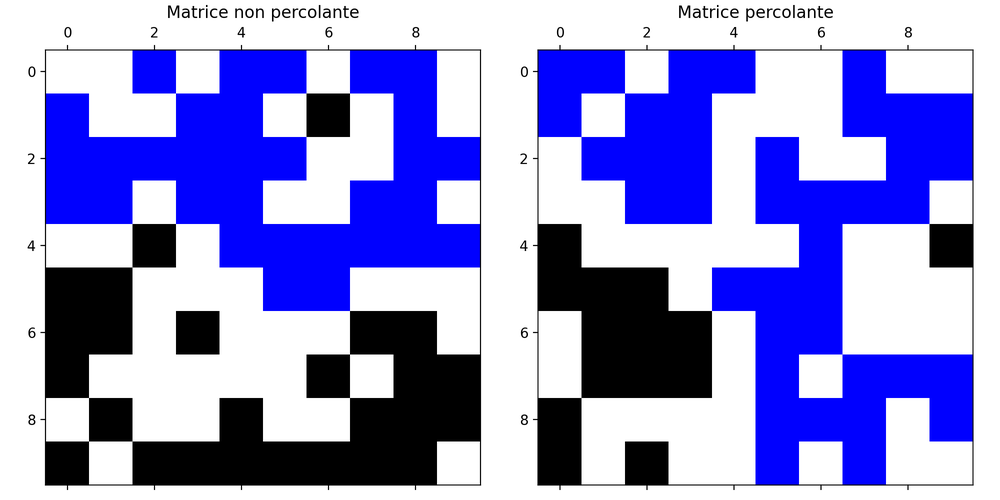</center>

**a)**
Écrire une fonction `generate(n,p)` qui génère une matrice de booléens de taille $n \times n$ telle que chaque entrée ait probabilité $p$ d'être juste et $1-p$ d'être fausse.

**Indication.**
La fonction `random.binomial` de Numpy peut être utile.




**b)**
Définir une fonction `fill(isopen)` qui pour une matrice de booléens donnée renvoie une autre matrice de booléens avec les entrées envahies par l'eau.

**Indication.**
Définir une matrice de booléens `isfull` pour stocker si une entrée est remplie par l'eau ou pas, puis définir une fonction récursive `flow(isopen, isfull, i, j)` permettant d'envahir toutes les entrées possibles à partir de $(i,j)$.




**c)**
À l'aide de Matplotlib représenter le remplissage de différentes matrices générées aléatoirement.




**d)**
Définir une fonction `percolate(isopen)` permettant de déterminer si une matrice de booléens percole ou non.




**e)**
<font color="red">!!</font> Calculer le temps nécessaire pour déterminer si une matrice de taille $50 \times 50$ avec $p=0.9$ percole ou non. Lire la documentation du module Numba pour réduire le temps de calcul en compilant une des fonctions: <https://numba.pydata.org/>.

**Indication.**
La fonction qui est la plus utilisée est la fonction récursive, donc c'est celle qu'il faut optimiser en la compilant.




**f)**
En faisant des statistiques, déterminer la probabilité qu'une matrice aléatoire booléenne de taille $n \times n$ avec probabilité $p$ percole. Étudier cette probabilité en fonction de $p$ et de $n$.

**Indication.**
Faire le graphique de cette probabilité de percolation en fonction de $p$ pour différentes valeurs de $n$.

**Réponse.**
Dans la limite des $n$ très grands, une matrice percole presque sûrement si $p>0.592746$ et presque jamais sinon.




**g)**
<font color="red">!!!</font> Les statistiques effectuées au point précédent sont un exemple typique de calculs pouvant être facilement exécutés en parallèle, car chaque cas est indépendant des autres. Paralléliser l'algorithme précédent de manière à utiliser tous les cœurs de son processeur, par exemple à l'aide du module [`mpi4py`](https://mpi4py.readthedocs.io/).

**Indication.**
L'utilisation de Jupyter Lab pour faire du calcul parallèle est assez complexe à mettre en œuvre, il vaut mieux utiliser la ligne de commande pour exécuter un script en parallèle, par exemple pour quatre cœurs: `mpirun -n 4 script.py`. À noter que [Open MPI](https://www.open-mpi.org/) ou [MPICH](https://www.mpich.org/) doit être installé sur l'ordinateur.

